In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import pandas as pd

In [2]:
x = np.loadtxt('../../../data/train_and_test_split/dpc_dataset_traintest_4_200_csv/test_targets/5.csv')

In [3]:
x

array([[1200., 1116., 1136.,  533., 1538.,  744.],
       [1200., 1116., 1140.,  533., 1539.,  747.],
       [1200., 1116., 1144.,  533., 1541.,  751.],
       ...,
       [1200., 1116., 1308., 1697., 1456., 2122.],
       [1200., 1116., 1318., 1695., 1453., 2124.],
       [1200., 1116., 1328., 1693., 1450., 2125.]])

In [4]:
x.shape

(200, 6)

In [5]:
x1 = x[:,:2]
x2 = x[:,2:4]
x3 = x[:,4:]

In [6]:
pos = np.mean(x[:, :2], axis=0)
scale = np.mean(np.linalg.norm(x[:,:2] - x[:,2:4], axis=1))

In [7]:
pos, scale

(array([1200.285, 1115.665]), 589.2816737603513)

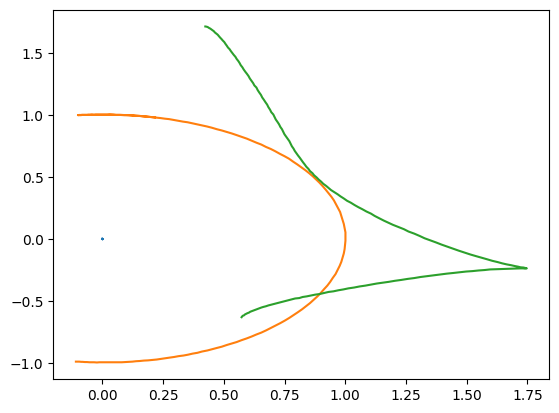

In [8]:
x1 = (x[:,:2] - pos) / scale
x2 = (x[:,2:4] - pos) / scale
x3 = (x[:,4:] - pos) / scale

k = 0
l = 1000

plt.plot(x1[k:l,0], x1[k:l,1])
plt.plot(x2[k:l,0], x2[k:l,1])
plt.plot(x3[k:l,0], x3[k:l,1])

In [10]:
# plt.plot(np.gradient(np.gradient(x2, axis=0, edge_order=2), axis=0, edge_order=2)[2:-2], 
#          sum(coeffs_a[i] * np.roll(x2, shift=sh-i, axis=0) for i in range(2*sh+1))[2:-2], 
#          '.')

In [11]:
coeffs_v = [1/12, -2/3, 0, 2/3, -1/12]
coeffs_a = [-1/12, 4/3, -5/2, 4/3, -1/12]
sh = 2

sum(coeffs_v[i] * np.roll(x2, shift=sh-i, axis=0) for i in range(2*sh+1))[2:]

array([[ 7.91924622e-03, -9.89905777e-04],
       [ 6.50509511e-03, -8.48490666e-04],
       [ 7.49500089e-03, -8.48490666e-04],
       [ 9.61622755e-03, -8.48490666e-04],
       [ 9.33339733e-03, -8.48490666e-04],
       [ 9.33339733e-03, -9.89905777e-04],
       [ 9.05056711e-03,  2.82830222e-04],
       [ 1.13132089e-02, -1.13132089e-03],
       [ 1.10303787e-02,  5.55111512e-17],
       [ 1.08889636e-02,  1.13132089e-03],
       [ 1.20202844e-02, -1.41415111e-04],
       [ 1.15960391e-02,  5.55111512e-17],
       [ 1.38586809e-02,  5.55111512e-17],
       [ 1.35758507e-02,  5.55111512e-17],
       [ 1.34344355e-02,  5.55111512e-17],
       [ 1.45657564e-02, -1.41415111e-04],
       [ 1.44243413e-02,  8.48490666e-04],
       [ 1.44243413e-02,  1.83839644e-03],
       [ 1.42829262e-02,  1.55556622e-03],
       [ 1.54142471e-02,  2.68688711e-03],
       [ 1.51314169e-02,  2.54547200e-03],
       [ 1.61213227e-02,  2.54547200e-03],
       [ 1.71112284e-02,  2.54547200e-03],
       [ 1.

In [12]:
xs = np.concatenate([x1, x2, x3], axis=1)

In [13]:
acs = sum(coeffs_a[i] * xs[i:i-len(coeffs_a)] for i in range(len(coeffs_a)))

In [14]:
xs = xs[:acs.shape[0]].reshape(-1, 3, 2)
vs = vs[:acs.shape[0]].reshape(-1, 3, 2)
acs = acs.reshape(-1, 3, 2)

NameError: name 'vs' is not defined

In [70]:
xs.shape

(2553, 3, 2)

In [38]:
dt = 0.01

Zs_arrs = []
Zs_dot_arrs = []


folder = f'../../../data/train_and_test_split/dpc_dataset_traintest_4_200_csv/train'

for c in tqdm.tqdm(sorted(os.listdir(folder))):
    
    x = np.loadtxt(f'{folder}/{c}')
    
    pos = np.mean(x[:, :2], axis=0)
    scale = np.mean(np.linalg.norm(x[:,:2] - x[:,2:4], axis=1))
    
    x1 = np.array([1., -1.]) * ((x[:,2:4] - pos) / scale)[:, ::-1]
    x2 = np.array([1., -1.]) * ((x[:,4:] - pos) / scale)[:, ::-1]
    
    xs = np.concatenate([x1, x2], axis=1)
    
#     vs = sum(coeffs_v[i] * np.roll(xs, shift=sh-i, axis=0) for i in range(2*sh+1))
#     acs = sum(coeffs_a[i] * np.roll(xs, shift=sh-i, axis=0) for i in range(2*sh+1))

    vs = np.gradient(xs, axis=0, edge_order=1)
    acs = np.gradient(vs, axis=0, edge_order=1)
    
    xs = xs[sh:-sh].reshape(-1, 2, 2)
    vs = vs[sh:-sh].reshape(-1, 2, 2) / dt
    acs = acs[sh:-sh].reshape(-1, 2, 2) / dt**2
    
    Zs = np.concatenate([xs, vs], axis=1)
    Zs_dot = np.concatenate([vs, acs], axis=1)
        
    k = 500
    print(c, Zs.shape, Zs_dot.shape)
    
    if Zs.shape[0] > k:
        for i in range(Zs.shape[0] // k):
            Zs_arrs.append(Zs[i*k:(i+1)*k])
            Zs_dot_arrs.append(Zs_dot[i*k:(i+1)*k])

 38%|████████████████████████████████████████████████████▌                                                                                       | 15/40 [00:00<00:00, 149.49it/s]

0.csv (6635, 4, 2) (6635, 4, 2)
1.csv (16071, 4, 2) (16071, 4, 2)
10.csv (11047, 4, 2) (11047, 4, 2)
11.csv (10204, 4, 2) (10204, 4, 2)
12.csv (7597, 4, 2) (7597, 4, 2)
13.csv (2391, 4, 2) (2391, 4, 2)
14.csv (7482, 4, 2) (7482, 4, 2)
15.csv (1503, 4, 2) (1503, 4, 2)
16.csv (15683, 4, 2) (15683, 4, 2)
17.csv (8480, 4, 2) (8480, 4, 2)
18.csv (4911, 4, 2) (4911, 4, 2)
19.csv (9330, 4, 2) (9330, 4, 2)
2.csv (10575, 4, 2) (10575, 4, 2)
20.csv (12755, 4, 2) (12755, 4, 2)
21.csv (14387, 4, 2) (14387, 4, 2)
22.csv (3262, 4, 2) (3262, 4, 2)
23.csv (13658, 4, 2) (13658, 4, 2)
24.csv (6733, 4, 2) (6733, 4, 2)
25.csv (8482, 4, 2) (8482, 4, 2)
26.csv (11734, 4, 2) (11734, 4, 2)
27.csv (5855, 4, 2) (5855, 4, 2)
28.csv (11621, 4, 2) (11621, 4, 2)
29.csv (14491, 4, 2) (14491, 4, 2)
3.csv (4151, 4, 2) (4151, 4, 2)
30.csv (633, 4, 2) (633, 4, 2)
31.csv (12862, 4, 2) (12862, 4, 2)
32.csv (5599, 4, 2) (5599, 4, 2)
33.csv (1439, 4, 2) (1439, 4, 2)
34.csv (15167, 4, 2) (15167, 4, 2)
35.csv (9191, 4, 2) (91

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 156.81it/s]

38.csv (14573, 4, 2) (14573, 4, 2)
39.csv (3171, 4, 2) (3171, 4, 2)
4.csv (2370, 4, 2) (2370, 4, 2)
5.csv (652, 4, 2) (652, 4, 2)
6.csv (17168, 4, 2) (17168, 4, 2)
7.csv (16846, 4, 2) (16846, 4, 2)
8.csv (13301, 4, 2) (13301, 4, 2)
9.csv (10052, 4, 2) (10052, 4, 2)


In [39]:
Zs_arrs = np.array(Zs_arrs)
Zs_dot_arrs = np.array(Zs_dot_arrs)

In [40]:
Nt = int(0.75 * Zs_arrs.shape[0])
Nt

512

In [41]:
np.save(f'Zs_train', Zs_arrs[:Nt])
np.save(f'Zs_dot_train', Zs_dot_arrs[:Nt])

np.save(f'Zs_test', Zs_arrs[Nt:])
np.save(f'Zs_dot_test', Zs_dot_arrs[Nt:])

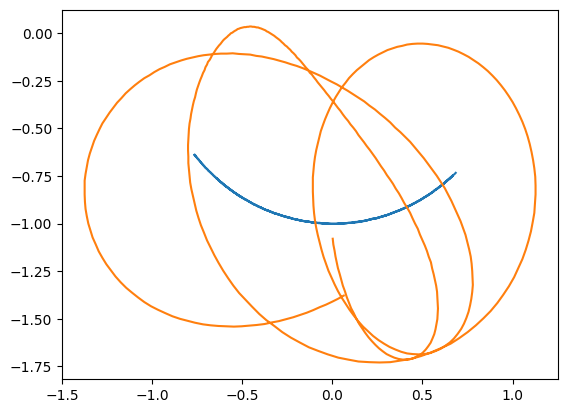

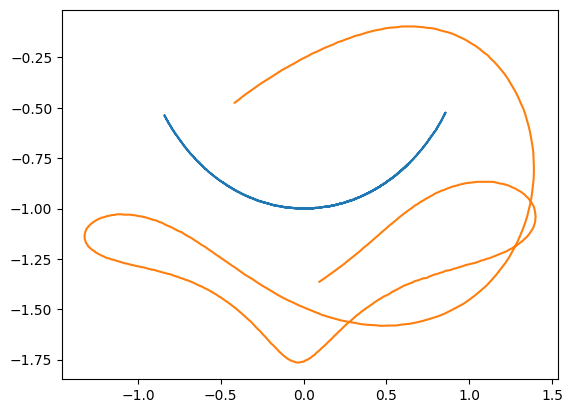

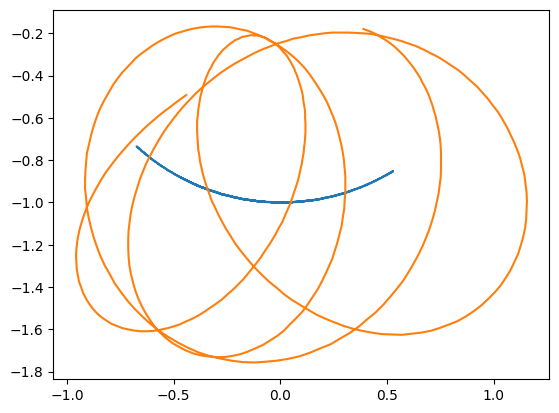

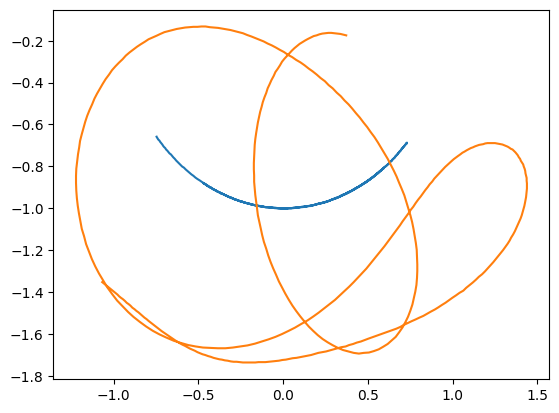

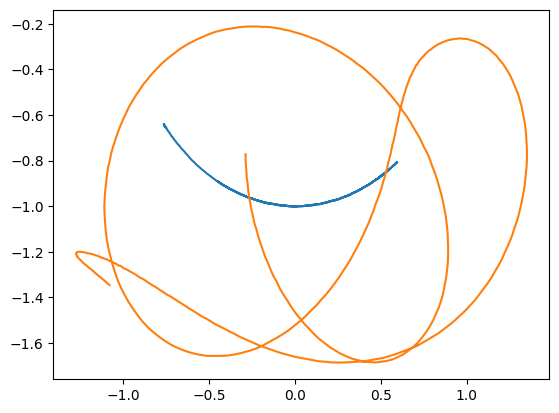

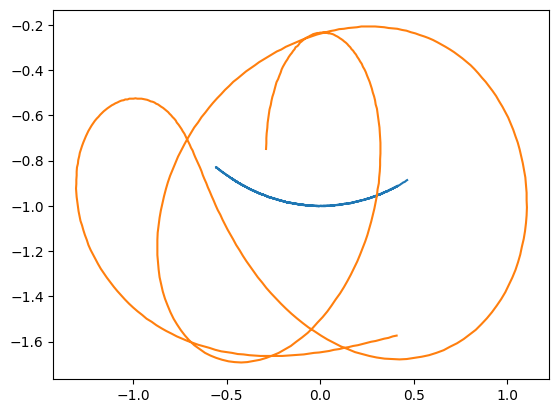

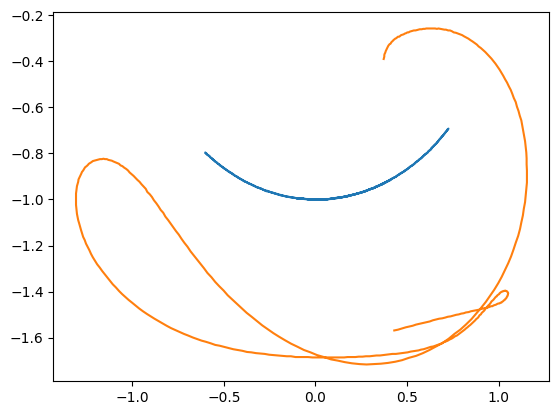

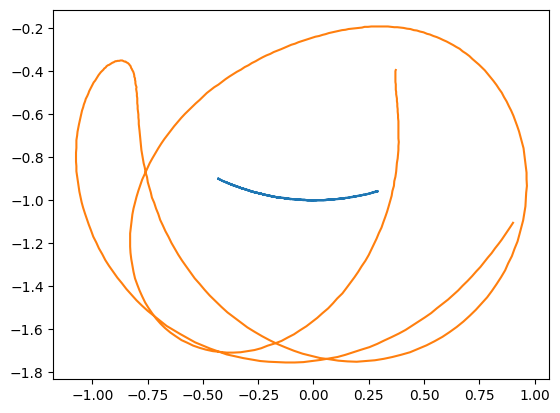

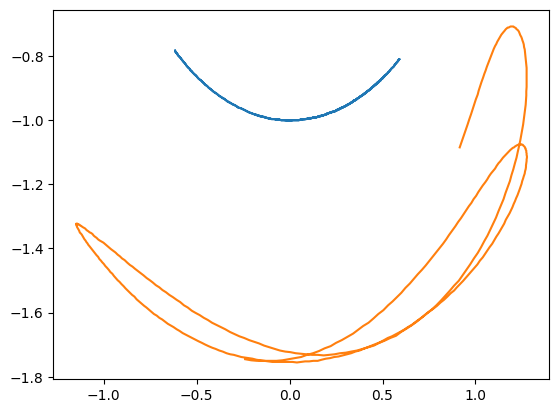

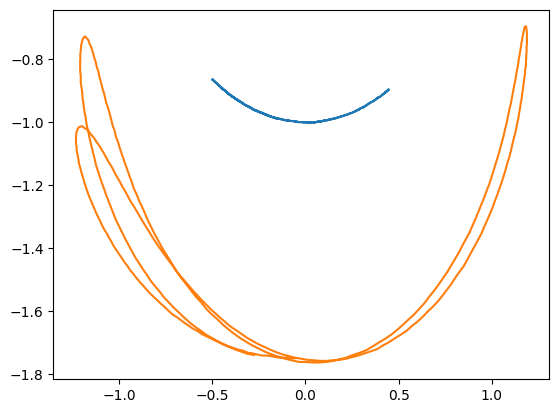

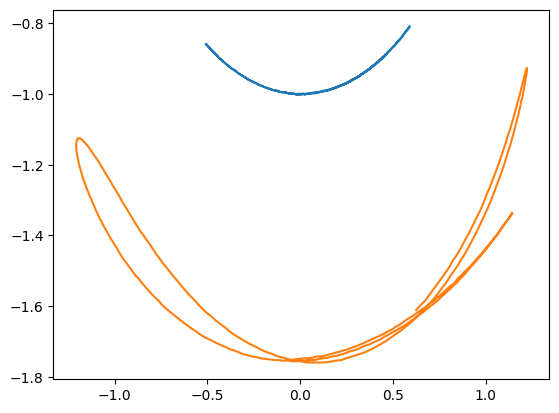

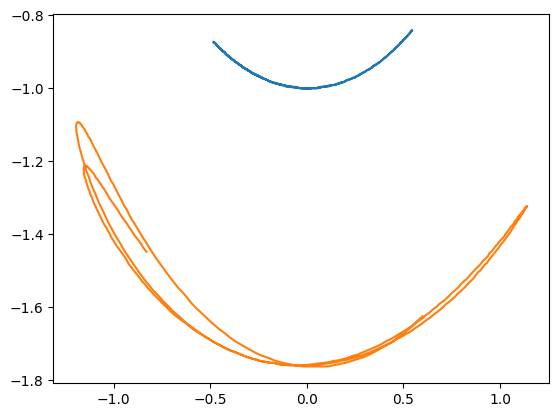

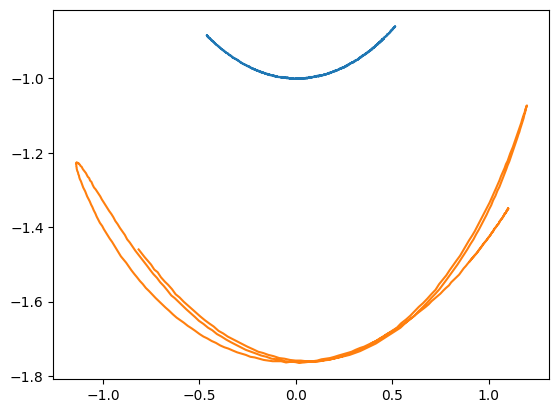

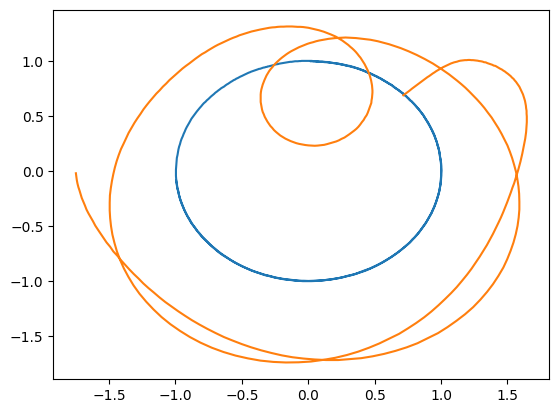

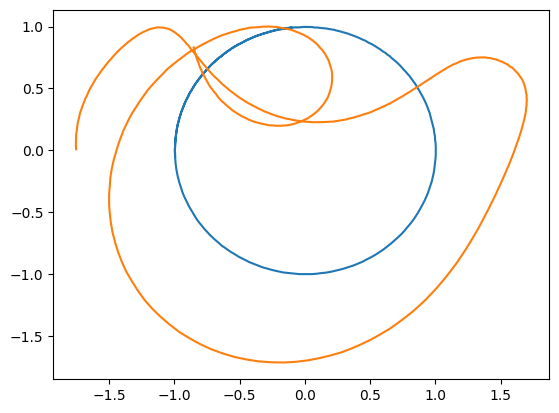

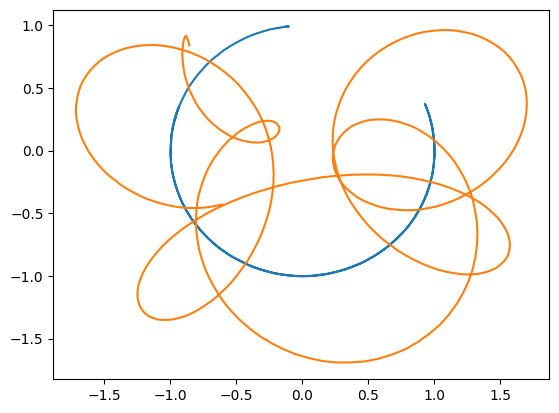

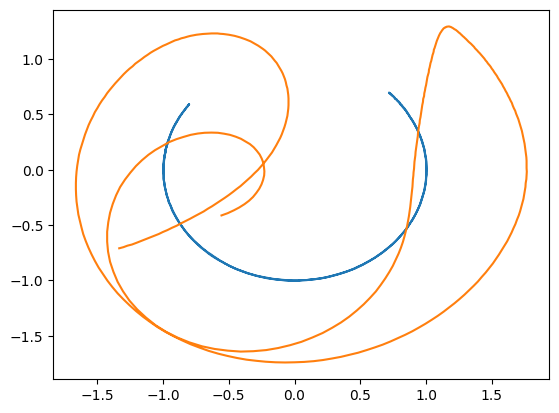

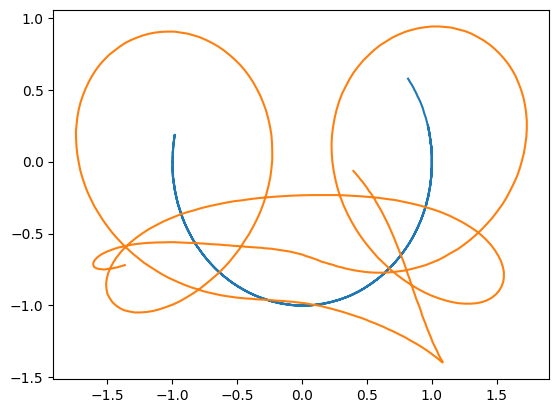

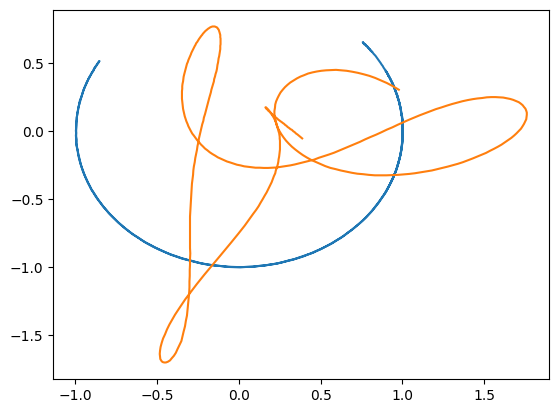

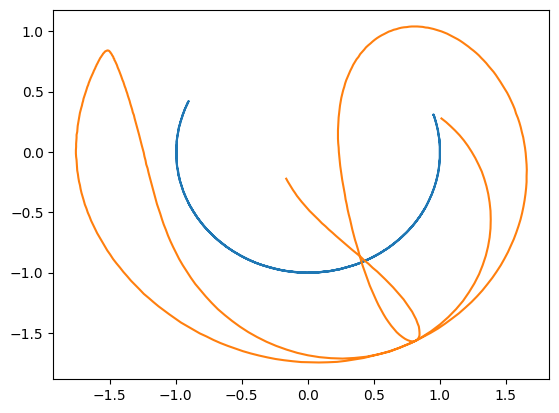

In [42]:
for p in range(20):

    for i in range(2):
        plt.plot(Zs_arrs[p, :, i, 0], Zs_arrs[p, :, i, 1])
    plt.show()

In [305]:
df.shape

(958394, 12)

In [43]:
df = pd.read_csv('../../../data/TBP_dataset.csv')

In [44]:
df

,r1_x,r1_y,r1_z,r2_x,r2_y,r2_z,r3_x,r3_y,r3_z,v1_x,...,v3_z,a1_x,a1_y,a1_z,a2_x,a2_y,a2_z,a3_x,a3_y,a3_z
0,1.472715,0.458162,-1.783420,-0.246754,0.304160,1.443783,-1.526091,0.599368,1.309417,-0.138412,...,0.007316,-0.014544,-0.000278,0.020936,-0.104642,0.026348,-0.024878,0.119186,-0.026070,0.003941
1,1.471713,0.458159,-1.783548,-0.245592,0.304225,1.444994,-1.525682,0.600784,1.309470,-0.138426,...,0.007320,-0.014535,-0.000274,0.020945,-0.104426,0.026398,-0.024952,0.118961,-0.026124,0.004007
2,1.470710,0.458156,-1.783676,-0.244432,0.304290,1.446205,-1.525272,0.602198,1.309523,-0.138441,...,0.007324,-0.014526,-0.000270,0.020953,-0.104210,0.026448,-0.025025,0.118736,-0.026178,0.004072
3,1.469708,0.458153,-1.783804,-0.243272,0.304355,1.447415,-1.524862,0.603613,1.309576,-0.138455,...,0.007328,-0.014517,-0.000266,0.020962,-0.103995,0.026497,-0.025098,0.118511,-0.026231,0.004137
4,1.468706,0.458149,-1.783932,-0.242113,0.304420,1.448625,-1.524450,0.605028,1.309629,-0.138470,...,0.007332,-0.014508,-0.000262,0.020970,-0.103780,0.026546,-0.025171,0.118287,-0.026285,0.004201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,-0.671892,0.837158,-1.447284,1.529639,-0.157186,-3.214849,0.834223,0.860264,-1.484105,-0.092193,...,-0.188842,0.104752,-0.006135,-0.015327,-0.030997,0.028697,0.049410,-0.073754,-0.022561,-0.034083
999996,-0.672559,0.836607,-1.447006,1.529738,-0.157412,-3.215630,0.833738,0.861488,-1.485473,-0.092089,...,-0.188876,0.104706,-0.006022,-0.015416,-0.030989,0.028704,0.049370,-0.073717,-0.022683,-0.033954
999997,-0.673226,0.836057,-1.446729,1.529836,-0.157636,-3.216412,0.833252,0.862711,-1.486840,-0.091984,...,-0.188910,0.104661,-0.005908,-0.015505,-0.030981,0.028712,0.049331,-0.073680,-0.022804,-0.033826
999998,-0.673891,0.835506,-1.446452,1.529933,-0.157861,-3.217193,0.832766,0.863934,-1.488208,-0.091879,...,-0.188943,0.104614,-0.005795,-0.015594,-0.030973,0.028719,0.049291,-0.073642,-0.022925,-0.033698


In [53]:
xx = np.array(df)

In [54]:
xx.shape

(1000000, 27)

In [74]:
xi = xx[:, :9].reshape(-1, 1000, 3, 3)
vi = xx[:, 9:18].reshape(-1, 1000, 3, 3)
ai = xx[:, 18:27].reshape(-1, 1000, 3, 3)

In [75]:
yy.shape

NameError: name 'yy' is not defined

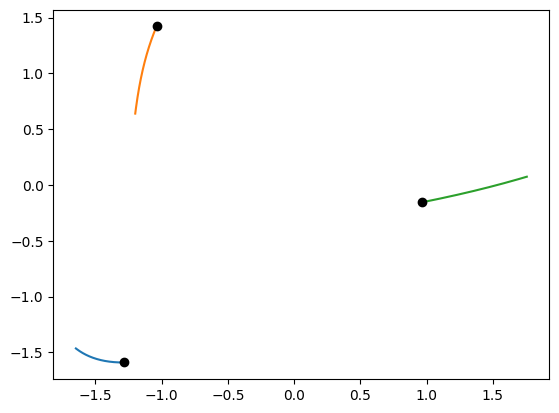

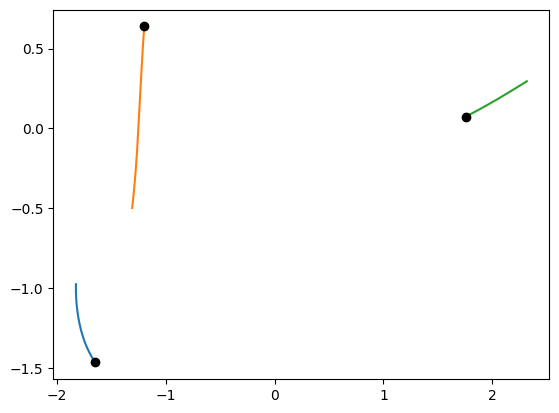

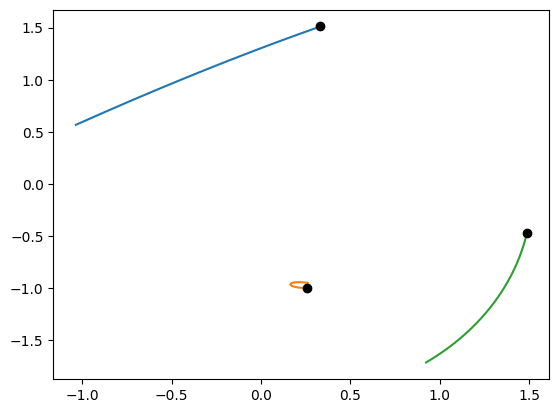

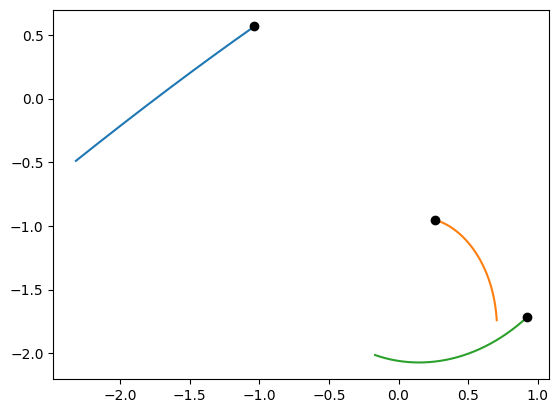

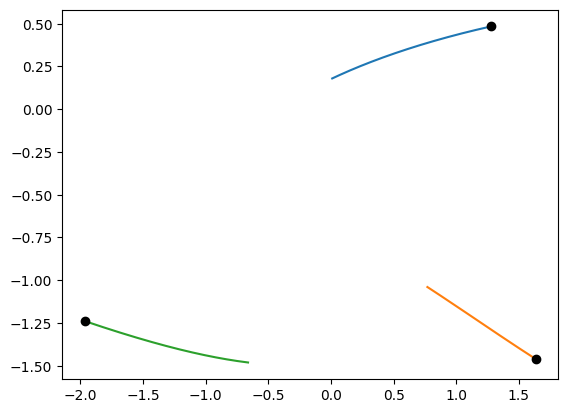

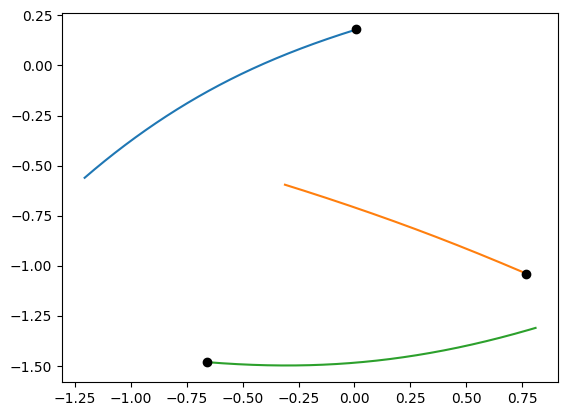

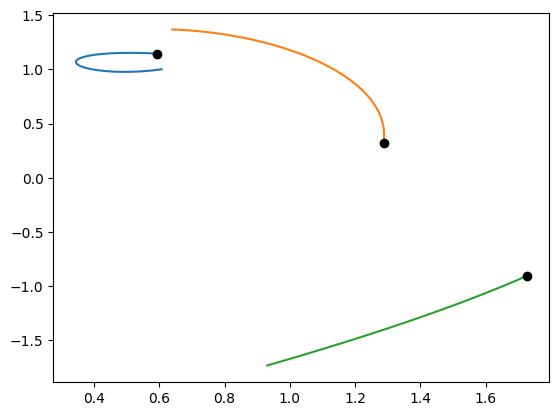

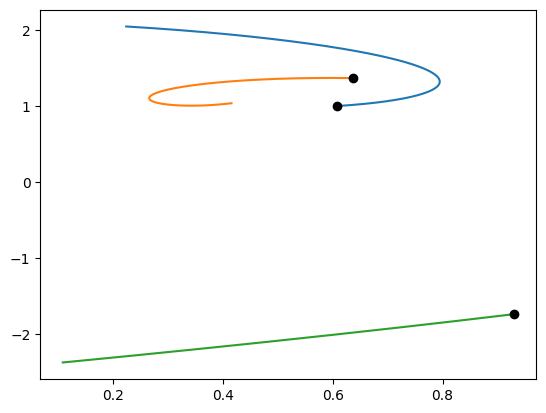

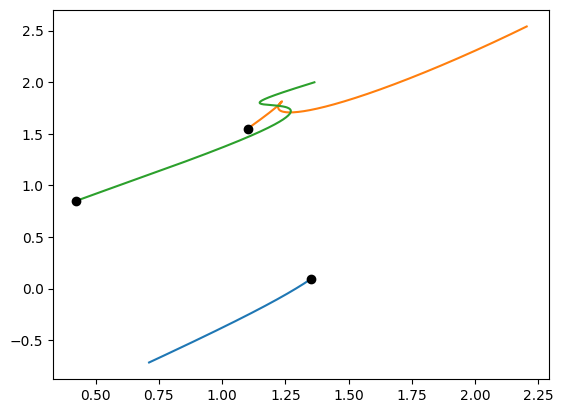

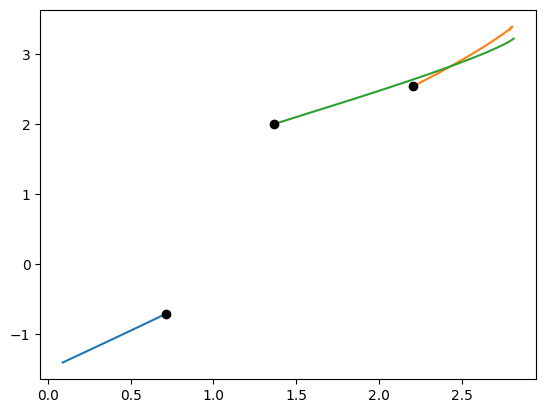

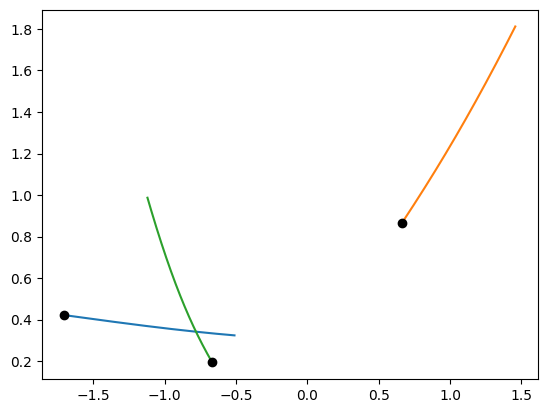

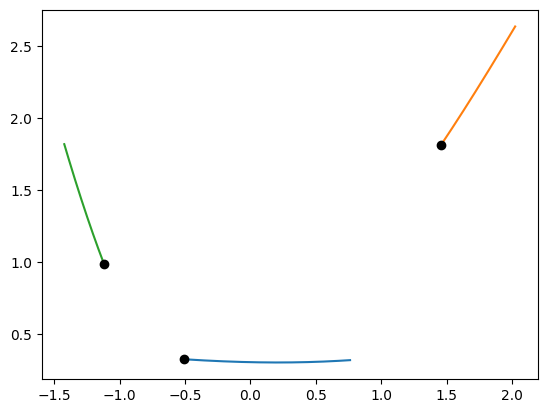

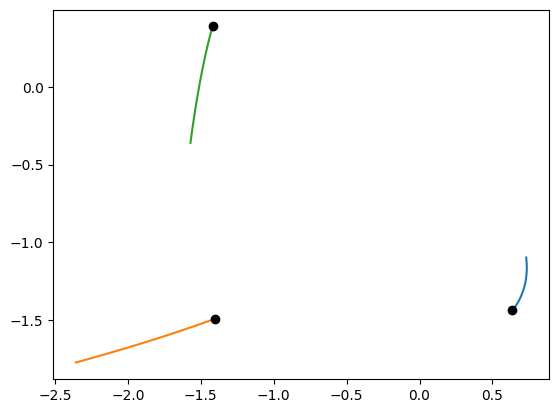

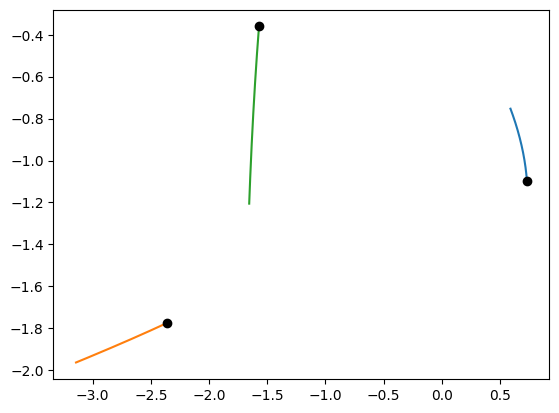

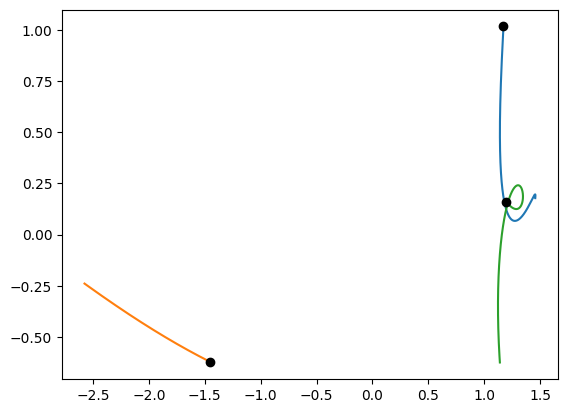

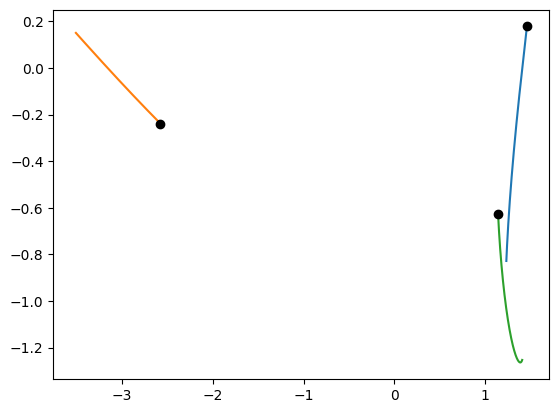

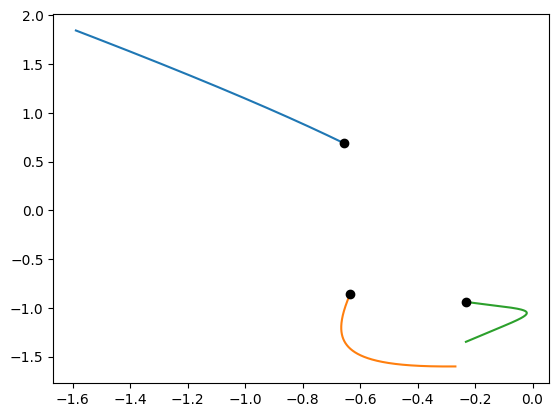

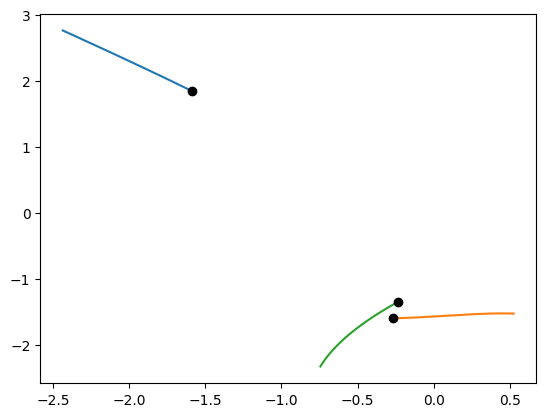

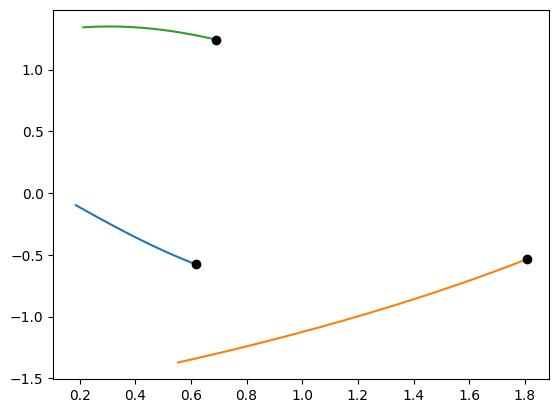

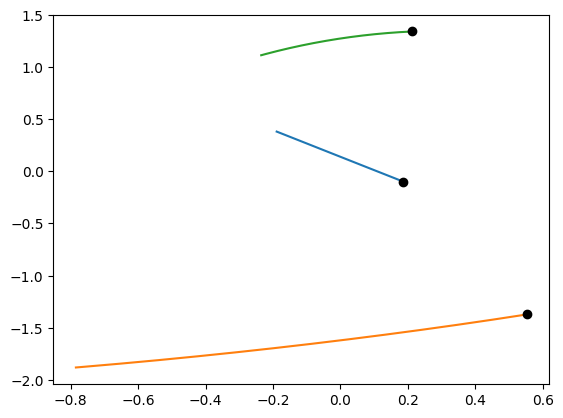

In [76]:
for p in range(80, 100):
    for i in range(3):
        plt.plot(xi[p, :, i, 0], xi[p, :, i, 1])
    plt.plot(xi[p, 0, :, 0], xi[p, 0, :, 1], 'o', color='black')
    plt.show()

In [77]:
zs_i = xx[:, :18].reshape(-1, 1000, 6, 3)
zs_dot_i = xx[:, 9:27].reshape(-1, 1000, 6, 3)

In [78]:
zs_i.shape, zs_dot_i.shape

((1000, 1000, 6, 3), (1000, 1000, 6, 3))

In [80]:
pf = '../nbody-n3'

os.makedirs(pf, exist_ok=True)

np.save(f'{pf}/Zs_train', zs_i[:400])
np.save(f'{pf}/Zs_dot_train', zs_dot_i[:400])
np.save(f'{pf}/Zs_test', zs_i[400:])
np.save(f'{pf}/Zs_dot_test', zs_dot_i[400:])

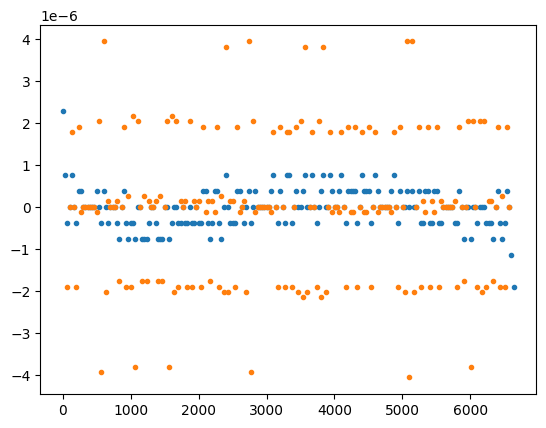

In [55]:
xx = np.linspace(0, x2.shape[0], 200)
yy = x2[:200,0]

dx = xx[1] - xx[0]

plt.plot(xx, np.gradient(np.gradient(yy, dx, axis=0, edge_order=2), dx, axis=0, edge_order=2), '.')
plt.plot(xx[2:-2], sum(coeffs_a[i] * np.roll(yy, shift=sh-i, axis=0) for i in range(2*sh+1))[2:-2] / dx**2, '.')